## Microsoft Stock Price Prediction using the Long Short Term Memory Technique (LSTM)


In [ ]:
#pip install yfinance

#!pip install yfinance

#import yfinance as yf

# Define the ticker symbol
#tickerSymbol = 'MSFT'

# Get data on this ticker
#tickerData = yf.Ticker(tickerSymbol)

# Get the historical prices for this ticker
#tickerDf = tickerData.history(period='1d', start='2014-01-01', end='2024-10-17')

# Display the historical data
#tickerDf

In [ ]:
#!pip instal Tensorflow 2.12

In [1]:
# For Data Analysis
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the Data set

df = pd.read_csv("MSFT_2014_2024_data.csv")

df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2014-01-02 00:00:00-05:00,31.279857,31.321734,31.070487,31.120737,30632200,0.0,0.0
1,2014-01-03 00:00:00-05:00,31.154233,31.170983,30.651744,30.911364,31134800,0.0,0.0
2,2014-01-06 00:00:00-05:00,30.861110,30.894610,30.241377,30.258127,43603700,0.0,0.0
3,2014-01-07 00:00:00-05:00,30.425629,30.559626,30.325130,30.492626,35802800,0.0,0.0
4,2014-01-08 00:00:00-05:00,30.149260,30.266506,29.797520,29.948263,59971700,0.0,0.0


In [3]:
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2711,2024-10-10 00:00:00-04:00,415.230011,417.350006,413.149994,415.839996,13848400,0.0,0.0
2712,2024-10-11 00:00:00-04:00,416.140015,417.130005,413.250000,416.320007,14144900,0.0,0.0
2713,2024-10-14 00:00:00-04:00,417.769989,424.040009,417.519989,419.140015,16653100,0.0,0.0
2714,2024-10-15 00:00:00-04:00,422.179993,422.480011,415.260010,418.739990,18900200,0.0,0.0
2715,2024-10-16 00:00:00-04:00,415.170013,416.359985,410.480011,416.119995,15508900,0.0,0.0


The historical dataset is from January 01, 2014 to October 16, 2024.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2716 entries, 0 to 2715
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          2716 non-null   object 
 1   Open          2716 non-null   float64
 2   High          2716 non-null   float64
 3   Low           2716 non-null   float64
 4   Close         2716 non-null   float64
 5   Volume        2716 non-null   int64  
 6   Dividends     2716 non-null   float64
 7   Stock Splits  2716 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 169.9+ KB


The data shows 2716 entries and 8 columns

In [5]:
# Check for missing values

print(df.isnull().sum())

Date            0
Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
dtype: int64


There ara no missing values.

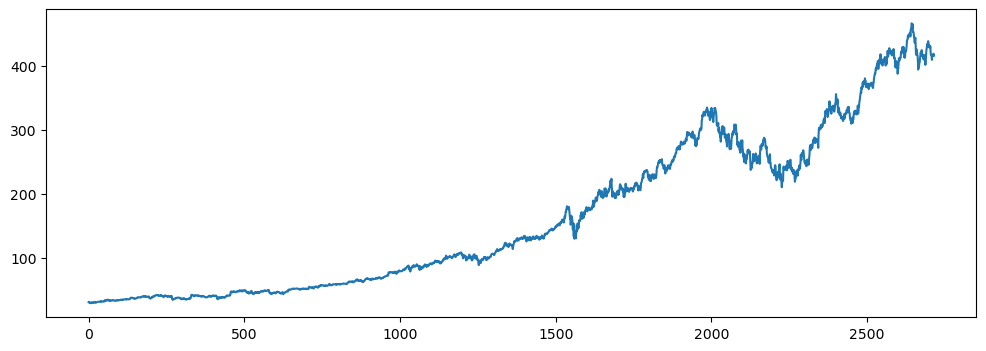

In [6]:
# Plot the closing prices over time
df["Close"].plot(figsize=(12,4));

It shows an upward trend.

### Feature Selection: Select relevant features ('Close' price).

In [7]:
# Assign the Close column from stock_MSFT to df1
df1 = df.reset_index()['Close']

In [8]:
df1.shape

(2716,)

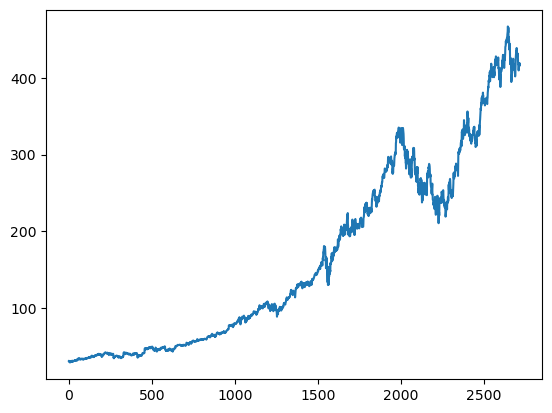

In [9]:

plt.plot(df1);

In [10]:
df1

0        31.120737
1        30.911364
2        30.258127
3        30.492626
4        29.948263
           ...    
2711    415.839996
2712    416.320007
2713    419.140015
2714    418.739990
2715    416.119995
Name: Close, Length: 2716, dtype: float64

Various closed prices at the end of the business day.

In [11]:
df1.shape

(2716,)

## Normalization: Normalize the data using MinMax scaling.

## LSTM are sensitive to the scale of the data, so we apply MinMax scaler

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [13]:
#Scaled datast
df1

array([[0.00417378],
       [0.00369512],
       [0.00220175],
       ...,
       [0.89122958],
       [0.89031508],
       [0.88432547]])

In [14]:
df1.shape

(2716, 1)

## Train-Test Split

### In splitting the dataset for training, the next data is always dependent on the previous data in time seris analysis.The splitting is in accordance with date unlike the normal regression analysis. We will be taking the first 65% of the data for training and the rest 35% for testing not in a random selection.

In [15]:
##splitting dataset into train and test split

training_size=int(len(df1)*0.70)
train_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [16]:
training_size,train_size

(1901, 815)

In [17]:
len(train_data),len(test_data)

(1901, 815)

In [18]:
import numpy
# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]    ###i=0, 0,1,2,3------99  100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return numpy.array(dataX), numpy.array(dataY)

The function transforms a sequence of data into a supervised learning dataset where each input consists of a sequence of time_step values, and the corresponding output is the next value in the sequence. This is useful for models like RNNs, LSTMs, or any other sequence prediction algorithms.

In [19]:
#reshape into X=t, t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

In [20]:
print(X_train.shape), print(y_train.shape)

(1800, 100)
(1800,)


(None, None)

In [21]:
print(X_test.shape), print(y_test.shape)

(714, 100)
(714,)


(None, None)

In [22]:
# Reshape input to be [samples, time steps, features] which is required for LSTM.
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

# Model Architecture

## Create the Stacked LSTM model

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [24]:
from tensorflow.keras.layers import Dropout

# Initialize the Sequential model
model = Sequential()

# First LSTM layer with 50 units, returning sequences
model.add(LSTM(units = 50, activation = 'relu', return_sequences=True, input_shape=(100, 1)))
model.add(Dropout(0.2))  # Dropout layer with 20% drop rate

# Second LSTM layer with 60 units, returning sequences
model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer with 80 units, does not return sequences
model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

# Fourth LSTM layer with 120 units, does not return sequences
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

# Output layer with 1 unit for regression output
model.add(Dense(1))

# Compile the model with mean squared error loss and Adam optimizer
model.compile(loss='mean_squared_error', optimizer='adam')

## Model Architecture
The model is built using a stacked LSTM architecture as follows:

- **Layer 1**: LSTM layer with 50 units, returning sequences.
- **Layer 2**: LSTM layer with 50 units, returning sequences.
- **Layer 3**: LSTM layer with 50 units, not returning sequences.
- **Output Layer**: Dense layer with 1 unit for the predicted stock price.

### Model Summary
The following is the summary of the model architecture:

In [25]:
# Display the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [26]:
from keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=64, callbacks=[reduce_lr], verbose=1)

Epoch 1/50
29/29 [==============================] - 23s 543ms/step - loss: 0.0164 - val_loss: 1.1596 - lr: 0.0010
Epoch 2/50
29/29 [==============================] - 13s 456ms/step - loss: 0.0021 - val_loss: 0.0217 - lr: 0.0010
Epoch 3/50
29/29 [==============================] - 13s 447ms/step - loss: 0.0014 - val_loss: 0.0071 - lr: 0.0010
Epoch 4/50
29/29 [==============================] - 14s 464ms/step - loss: 0.0016 - val_loss: 0.0020 - lr: 0.0010
Epoch 5/50
29/29 [==============================] - 13s 447ms/step - loss: 0.0015 - val_loss: 0.0020 - lr: 0.0010
Epoch 6/50
29/29 [==============================] - 13s 450ms/step - loss: 0.0016 - val_loss: 0.0024 - lr: 0.0010
Epoch 7/50
29/29 [==============================] - 13s 444ms/step - loss: 0.0014 - val_loss: 0.0061 - lr: 0.0010
Epoch 8/50
29/29 [==============================] - 14s 479ms/step - loss: 0.0012 - val_loss: 0.0023 - lr: 0.0010
Epoch 9/50
29/29 [==============================] - 13s 432ms/step - loss: 0.0012 - val_

The result shows the training and validation loss at each epoch for your model over 50 epochs, with a decreasing learning rate throughout the training process.

1. Loss Values:

    Training Loss: This measures the model's error on the training dataset. Lower values are better, indicating that the model's predictions are getting closer to the true values over time.
    Validation Loss: This measures the model's error on a separate validation dataset, which is not used for training. It's an indicator of how well the model generalizes to unseen data.

In this case:

    The initial training loss was 0.0164, which decreased over the epochs, ending around 0.0009.
    The validation loss started high (1.1596) but quickly dropped to much lower values, fluctuating around 0.004-0.006 by the end of the training.

2. Learning Rate (lr):

    The learning rate started at 0.001 and was reduced gradually over the epochs using a learning rate scheduler.
    Reducing the learning rate can help the model make smaller updates as it gets closer to the optimal solution, preventing it from overshooting the minimum of the loss function.

3. Performance Over Epochs:

    Early Epochs: The model initially saw significant improvement (from a validation loss of 1.1596 in Epoch 1 to around 0.0016 by Epoch 9). This shows that the model was learning the relationship in the data quite well at the start.
    Later Epochs: The validation loss stabilized with some fluctuations between 0.0016 and 0.006 by Epoch 50. However, there's no significant overfitting as the validation loss doesn’t diverge dramatically from the training loss.

4. Interpretation of Results:

    Decreasing Validation Loss: This is a good sign that your model is learning from the data effectively. The sharp decrease in validation loss shows that the model improved quickly early on.
    Learning Rate Tuning: By reducing the learning rate at regular intervals, you've allowed the model to fine-tune its weights more carefully, which can explain why the validation loss didn’t increase significantly after the early epochs.
    Validation Fluctuations: The small fluctuations in validation loss near the end (between 0.004 and 0.006) are normal and indicate that the model’s generalization is stabilizing, though slight improvements may still be possible with further tuning.

5. Generalization:

    Since the validation loss is close to the training loss and doesn’t increase significantly, it indicates that the model is generalizing well and isn't overfitting to the training data.

In [27]:
#Predict and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

23/23 [==============================] - 2s 86ms/step


In [28]:
# Inverse transform the predicted values
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Inverse transform the actual values for y_train and y_test
y_train = scaler.inverse_transform(y_train.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

In [29]:
import math
from sklearn.metrics import mean_squared_error

# Calculate RMSE for training data
train_rmse = math.sqrt(mean_squared_error(y_train, train_predict))
print(f'Training Data RMSE: {train_rmse}')

# Calculate RMSE for test data
test_rmse = math.sqrt(mean_squared_error(y_test, test_predict))
print(f'Test Data RMSE: {test_rmse}')

Training Data RMSE: 7.228900748390265
Test Data RMSE: 30.03906763917052


Interpretation:

    Training RMSE (7.22) is quite low, suggesting that the model performs well on the training data.
    Test RMSE (30.03) is higher than the training RMSE, which indicates that the model has a higher error rate when making predictions on unseen data. While the gap between the two RMSE values isn't extremely large, this difference suggests the model might be slightly overfitting the training data, as it generalizes less effectively to the test data.

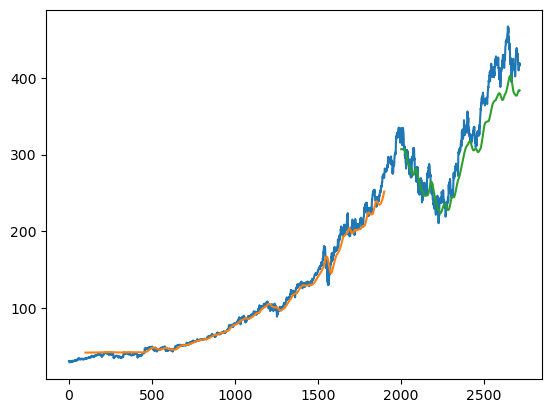

In [30]:
# Plotting
# Shift train predictions for plotting
look_back=100
trainPredictPlot=numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

# Shift test predictions  for plotting
testPredictPlot=numpy.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict

# Plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [31]:
len(test_data)

815

In [32]:
X_input=test_data[715:].reshape(1,-1)
X_input.shape

(1, 100)

In [33]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()

In [34]:
# Demonstrate predictions for next 30 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1, -1)
        X_input = X_input.reshape((1, n_steps, 1))
        #print (X_input)
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps, 1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        
            
print(lst_output)        

[0.808445]
101
1 day input [0.91501832 0.91239405 0.87930507 0.88035478 0.87668073 0.88249989
 0.90061891 0.90178269 0.90025382 0.90942743 0.92040382 0.93952699
 0.94071365 0.94297283 0.9562084  0.95157596 0.95011554 0.95942603
 0.95461109 0.962096   0.96485723 0.96643179 0.95296802 0.97528594
 0.98110504 0.98450518 1.         0.99698776 0.9816984  0.99701057
 0.97065351 0.96802917 0.96896481 0.95883274 0.94514069 0.93795243
 0.93051307 0.94381715 0.94817582 0.91177787 0.88781687 0.9034942
 0.90682598 0.89813159 0.88770281 0.88487307 0.86520223 0.8347604
 0.8449381  0.84224539 0.85196667 0.85956572 0.86136849 0.87779895
 0.88430259 0.8955503  0.88969785 0.89669335 0.90416892 0.90266014
 0.88302237 0.8858572  0.87831299 0.87911314 0.87170616 0.87746714
 0.88665735 0.86905426 0.86781974 0.86665387 0.85135977 0.86054992
 0.87993618 0.9001454  0.90919839 0.91740553 0.91912011 0.9278302
 0.91790847 0.93592305 0.92810452 0.92408101 0.91415929 0.92088039
 0.91905153 0.9115302  0.91674253 0.89

8 day output [[0.7933345]]
9 day input [0.90025382 0.90942743 0.92040382 0.93952699 0.94071365 0.94297283
 0.9562084  0.95157596 0.95011554 0.95942603 0.95461109 0.962096
 0.96485723 0.96643179 0.95296802 0.97528594 0.98110504 0.98450518
 1.         0.99698776 0.9816984  0.99701057 0.97065351 0.96802917
 0.96896481 0.95883274 0.94514069 0.93795243 0.93051307 0.94381715
 0.94817582 0.91177787 0.88781687 0.9034942  0.90682598 0.89813159
 0.88770281 0.88487307 0.86520223 0.8347604  0.8449381  0.84224539
 0.85196667 0.85956572 0.86136849 0.87779895 0.88430259 0.8955503
 0.88969785 0.89669335 0.90416892 0.90266014 0.88302237 0.8858572
 0.87831299 0.87911314 0.87170616 0.87746714 0.88665735 0.86905426
 0.86781974 0.86665387 0.85135977 0.86054992 0.87993618 0.9001454
 0.90919839 0.91740553 0.91912011 0.9278302  0.91790847 0.93592305
 0.92810452 0.92408101 0.91415929 0.92088039 0.91905153 0.9115302
 0.91674253 0.89477303 0.88663447 0.88528567 0.88418831 0.86928288
 0.88110205 0.88738886 0.8836

18 day output [[0.7565902]]
19 day input [0.95461109 0.962096   0.96485723 0.96643179 0.95296802 0.97528594
 0.98110504 0.98450518 1.         0.99698776 0.9816984  0.99701057
 0.97065351 0.96802917 0.96896481 0.95883274 0.94514069 0.93795243
 0.93051307 0.94381715 0.94817582 0.91177787 0.88781687 0.9034942
 0.90682598 0.89813159 0.88770281 0.88487307 0.86520223 0.8347604
 0.8449381  0.84224539 0.85196667 0.85956572 0.86136849 0.87779895
 0.88430259 0.8955503  0.88969785 0.89669335 0.90416892 0.90266014
 0.88302237 0.8858572  0.87831299 0.87911314 0.87170616 0.87746714
 0.88665735 0.86905426 0.86781974 0.86665387 0.85135977 0.86054992
 0.87993618 0.9001454  0.90919839 0.91740553 0.91912011 0.9278302
 0.91790847 0.93592305 0.92810452 0.92408101 0.91415929 0.92088039
 0.91905153 0.9115302  0.91674253 0.89477303 0.88663447 0.88528567
 0.88418831 0.86928288 0.88110205 0.88738886 0.88368536 0.88478272
 0.89122958 0.89031508 0.88432547 0.80844498 0.80766881 0.80665445
 0.80532449 0.80363357 0

27 day output [[0.72527325]]
28 day input [0.99698776 0.9816984  0.99701057 0.97065351 0.96802917 0.96896481
 0.95883274 0.94514069 0.93795243 0.93051307 0.94381715 0.94817582
 0.91177787 0.88781687 0.9034942  0.90682598 0.89813159 0.88770281
 0.88487307 0.86520223 0.8347604  0.8449381  0.84224539 0.85196667
 0.85956572 0.86136849 0.87779895 0.88430259 0.8955503  0.88969785
 0.89669335 0.90416892 0.90266014 0.88302237 0.8858572  0.87831299
 0.87911314 0.87170616 0.87746714 0.88665735 0.86905426 0.86781974
 0.86665387 0.85135977 0.86054992 0.87993618 0.9001454  0.90919839
 0.91740553 0.91912011 0.9278302  0.91790847 0.93592305 0.92810452
 0.92408101 0.91415929 0.92088039 0.91905153 0.9115302  0.91674253
 0.89477303 0.88663447 0.88528567 0.88418831 0.86928288 0.88110205
 0.88738886 0.88368536 0.88478272 0.89122958 0.89031508 0.88432547
 0.80844498 0.80766881 0.80665445 0.80532449 0.80363357 0.80156761
 0.79913938 0.79638058 0.79333448 0.79004973 0.78657746 0.782965
 0.77925515 0.7754848 

In [35]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

Explanation:

    day_new: This creates an array ranging from 1 to 100, representing the last 100 days of data (assuming the data is sequentially indexed).
    day_pred: This creates an array ranging from 101 to 130, representing the next 30 days for which you're making predictions.

In [36]:
len(df1)

2716

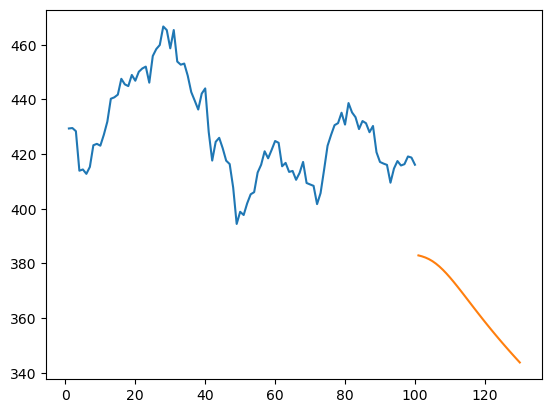

In [37]:
# Forecast
plt.plot(day_new,scaler.inverse_transform(df1[2616:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output));

This shows a slight drop in price in the next 30 days.

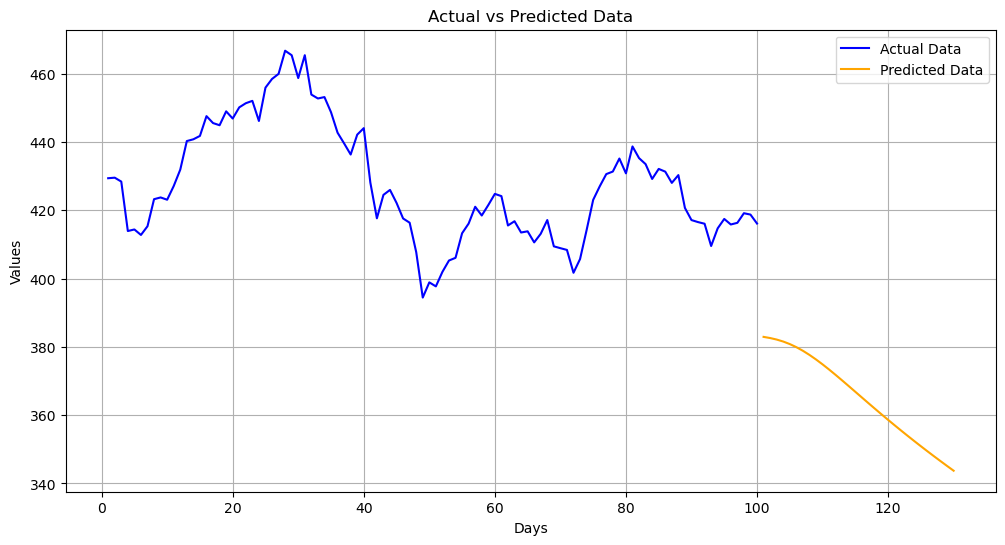

In [38]:
import matplotlib.pyplot as plt

# Assuming df1 is defined and contains the scaled actual data
# Ensure df1 has at least 100 more entries than 2616
plt.figure(figsize=(12, 6))

# Plot the actual data for the last 100 days
plt.plot(day_new, scaler.inverse_transform(df1[2616:]), label='Actual Data', color='blue')

# Plot the predicted data for the next 30 days
plt.plot(day_pred, scaler.inverse_transform(np.array(lst_output).reshape(-1, 1)), label='Predicted Data', color='orange')

# Adding titles and labels
plt.title('Actual vs Predicted Data')
plt.xlabel('Days')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

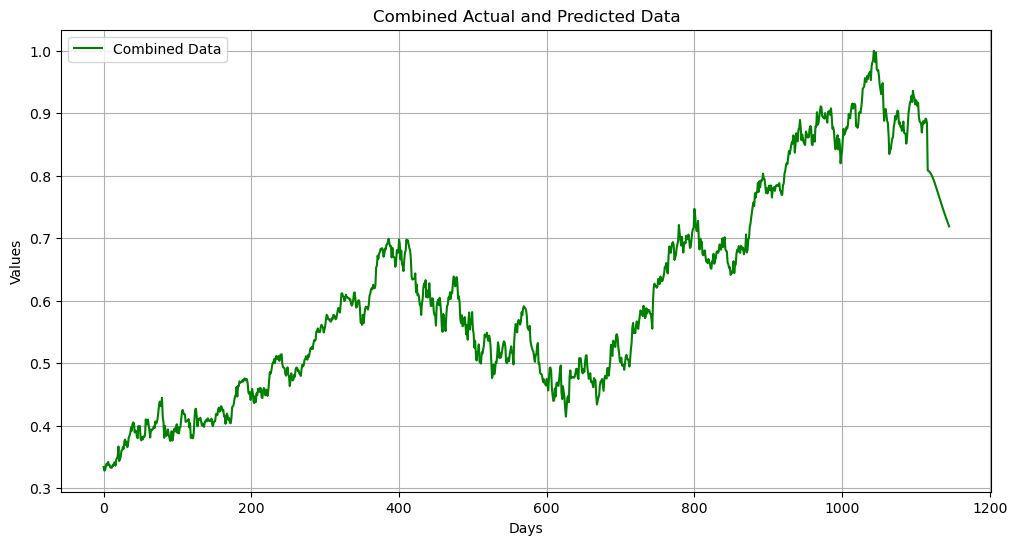

In [39]:
import matplotlib.pyplot as plt

# Convert df1 to a list and extend it with the predictions
df3 = df1.tolist()  # Make sure df1 is a 2D array or DataFrame
df3.extend(lst_output)  # Append the predictions to the end of df3

# Plotting the combined data
plt.figure(figsize=(12, 6))
plt.plot(df3[1600:], label='Combined Data', color='green')  # Adjust color as desired

# Adding titles and labels
plt.title('Combined Actual and Predicted Data')
plt.xlabel('Days')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

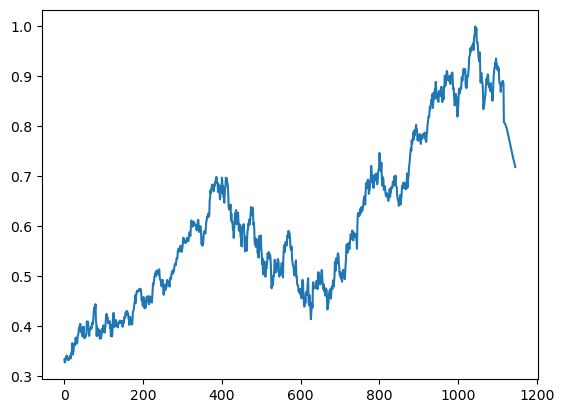

In [40]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1600:]);

The summary of the Stacke LSTM model shows a good predictive model which predicts a slight drop in MSFT stock prices over the next month. (October 18, 2024 – November 18, 2024)

Using a stacked LSTM (Long Short-Term Memory) model for predicting stock prices or other time series data has several benefits over simple LSTM or other traditional models. Here's why stacked LSTMs can be advantageous for stock market prediction and similar tasks:
1. Capturing Complex Temporal Dependencies
•	Deeper representation: A stacked LSTM has multiple LSTM layers stacked on top of each other. This depth allows the model to capture more complex temporal dependencies, such as long-term trends and short-term fluctuations in stock prices.
•	Multi-layered memory: Each LSTM layer learns different aspects of the sequence data. The lower layers might capture short-term patterns (daily or weekly trends), while upper layers could capture long-term trends (monthly or yearly).
2. Handling Sequential Data
•	Sequential memory: LSTMs are specifically designed to handle sequential data by maintaining a memory of previous inputs, making them well-suited for stock price data where time and order matter (i.e., today's stock prices depend on yesterday's).
•	Avoiding vanishing gradients: LSTM’s architecture is designed to mitigate the vanishing gradient problem, which allows the model to capture longer dependencies compared to standard RNNs.
3. Better Performance on Time Series Prediction
•	Improved generalization: The additional layers in stacked LSTMs allow the model to better generalize and capture a wider range of temporal patterns. This can improve its ability to predict future stock prices, especially when the time series has multiple timescales (e.g., day-to-day fluctuations and long-term market trends).
•	Increased flexibility: Multiple layers allow the model to be more flexible in learning complex features from the data, leading to improved predictive performance.
4. Feature Extraction at Multiple Levels
•	Hierarchical feature learning: With stacked LSTM layers, the model can learn different features at different layers. The lower layers may focus on fine-grained features like small daily changes, while the upper layers focus on broader, more general trends.
•	Better pattern recognition: The model can extract more meaningful representations of data, which can help in making better predictions even in volatile or noisy stock markets.
5. Handling Non-linearities in Stock Prices
•	Non-linear relationships: Stock price movements are often influenced by non-linear factors, such as market sentiment, news events, and macroeconomic indicators. LSTMs, and particularly stacked LSTMs, can better capture these non-linear relationships compared to simpler models like linear regression.
•	Temporal dependencies: Stacked LSTMs can learn both short-term fluctuations and long-term dependencies in stock prices, providing more accurate predictions in a highly dynamic and non-linear environment.
6. Multivariate Time Series Prediction
•	Multiple input variables: Stacked LSTMs are effective in handling multivariate time series (e.g., stock prices, trading volume, economic indicators, etc.), making them suitable for predicting stock market trends based on multiple factors.
•	More robust predictions: Incorporating several features or data points such as historical stock prices, technical indicators, and economic factors helps the model to make more robust and informed predictions.
7. Better Overfitting Control
•	Dropout regularization: Adding dropout layers between stacked LSTM layers helps mitigate overfitting, which is important for stock market prediction, as the model needs to generalize well to unseen data.
•	Complex patterns without overfitting: Stacking multiple LSTM layers can capture very complex patterns, but with proper regularization, the risk of overfitting to the training data is reduced.
8. Improved Long-Term Forecasting
•	Longer prediction horizons: Stacked LSTMs may offer better performance for long-term forecasting since they are designed to capture long-term dependencies. This is beneficial in stock markets, where long-term trends are important for making strategic investment decisions.
Challenges to Consider:
•	Computational complexity: Stacked LSTMs have a larger number of parameters, which increases the computational cost and training time.
•	Risk of overfitting: With more parameters, there's an increased risk of overfitting to the training data, especially if the dataset is small or noisy. Proper regularization techniques like dropout or L2 regularization are essential.


Conclusion:

Stacked LSTMs offer the ability to model complex temporal relationships in stock market data, making them well-suited for predicting stock prices, market trends, and other time series tasks. They provide more robust and flexible models, especially when there are long-term dependencies and multiple influencing factors. However, careful tuning and regularization are needed to balance complexity and performance.